In [6]:
from roboflow import Roboflow
from futstats.annotations.anns import Detection
import cv2
import matplotlib.pyplot as plt


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
rf = Roboflow(api_key="QSiiIsrsCxvjFQpeVqhW")
project = rf.workspace().project("football-field-new")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


In [4]:
pred = model.predict('../images/frame.png', confidence=40, overlap=30).json()
print(pred)

{'predictions': [{'x': 973, 'y': 396, 'width': 45, 'height': 29, 'confidence': 0.8171024918556213, 'class': '14', 'class_id': 5, 'image_path': '../images/frame.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 994, 'y': 291, 'width': 36, 'height': 27, 'confidence': 0.7407734394073486, 'class': '13', 'class_id': 4, 'image_path': '../images/frame.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 949, 'y': 518, 'width': 45, 'height': 34, 'confidence': 0.7391006946563721, 'class': '15', 'class_id': 6, 'image_path': '../images/frame.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 881, 'y': 836, 'width': 49, 'height': 27, 'confidence': 0.7259702086448669, 'class': '16', 'class_id': 7, 'image_path': '../images/frame.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 149, 'y': 327, 'width': 36, 'height': 25, 'confidence': 0.690089225769043, 'class': '17', 'class_id': 8, 'image_path': '../images/frame.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 20, 'y': 383,

In [5]:
results = model.predict('../images/frame.png', confidence=40, overlap=30).json()
detections = Detection.from_roboflow(preds=results)
print(len(detections))

{'x': 973, 'y': 396, 'width': 45, 'height': 29, 'confidence': 0.8171024918556213, 'class': '14', 'class_id': 5, 'image_path': '../images/frame.png', 'prediction_type': 'ObjectDetectionModel'}
{'x': 994, 'y': 291, 'width': 36, 'height': 27, 'confidence': 0.7407734394073486, 'class': '13', 'class_id': 4, 'image_path': '../images/frame.png', 'prediction_type': 'ObjectDetectionModel'}
{'x': 949, 'y': 518, 'width': 45, 'height': 34, 'confidence': 0.7391006946563721, 'class': '15', 'class_id': 6, 'image_path': '../images/frame.png', 'prediction_type': 'ObjectDetectionModel'}
{'x': 881, 'y': 836, 'width': 49, 'height': 27, 'confidence': 0.7259702086448669, 'class': '16', 'class_id': 7, 'image_path': '../images/frame.png', 'prediction_type': 'ObjectDetectionModel'}
{'x': 149, 'y': 327, 'width': 36, 'height': 25, 'confidence': 0.690089225769043, 'class': '17', 'class_id': 8, 'image_path': '../images/frame.png', 'prediction_type': 'ObjectDetectionModel'}
{'x': 20, 'y': 383, 'width': 32, 'height'

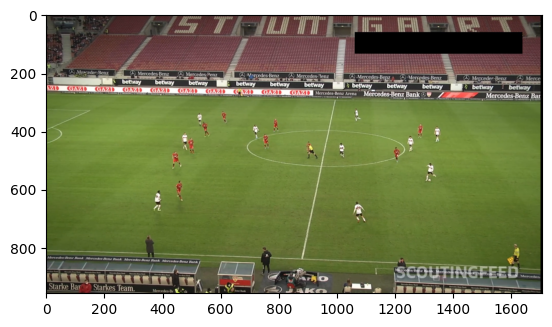

In [8]:
img = cv2.cvtColor(cv2.imread('../images/frame.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

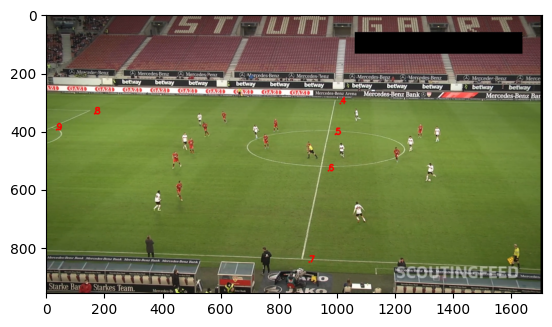

In [9]:
points = img.copy()

for detection in detections:
    x2, y2 = detection.rect.bottom_right.int_xy_tuple
    x1, y1 = detection.rect.top_left.int_xy_tuple
    # get the center of the box
    center = (int((x1 + x2) / 2),int((y1 + y2) / 2))
    points = cv2.circle(points, center, 3, (255, 0, 0), -1)
    points = cv2.putText(points, str(detection.class_id), center, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),3)


plt.imshow(points)